In [12]:
# ============================================
# 1. Import thư viện
# ============================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================
# 2. Load dữ liệu và chọn đặc trưng
# ============================================
df = pd.read_csv('data/VN_House_price_Clean2.csv')
df.shape

(22196, 12)

=== Đang chạy KMeans với các giá trị k từ 2 đến 8 ===
k = 1, Inertia = 133176.00
k = 2, Inertia = 97686.49, Silhouette = 0.2745
k = 3, Inertia = 80079.82, Silhouette = 0.2771
k = 4, Inertia = 70043.15, Silhouette = 0.2600
k = 5, Inertia = 63577.35, Silhouette = 0.2359
k = 6, Inertia = 57710.66, Silhouette = 0.2358
k = 7, Inertia = 53560.45, Silhouette = 0.2115
k = 8, Inertia = 50991.65, Silhouette = 0.2003


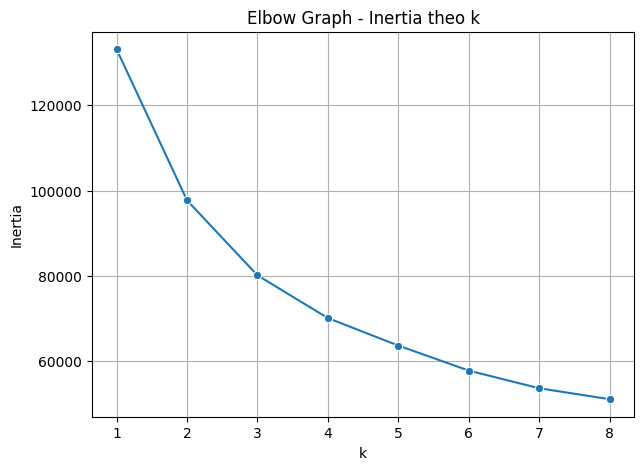

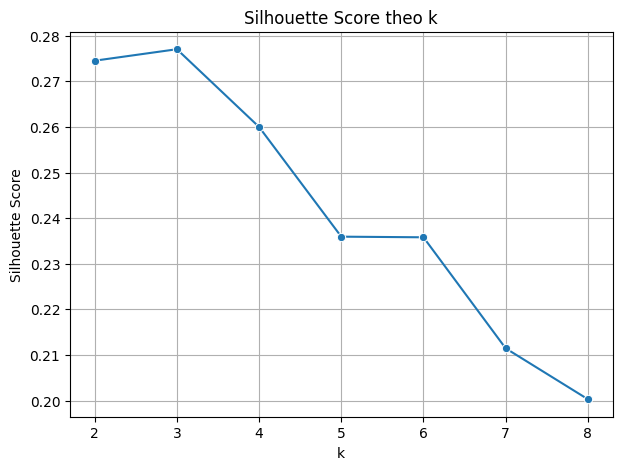

In [13]:


# ============================================
# 1. Chọn cột vật lý để phân cụm
# ============================================
physical_cols = ['Area', 'Floors', 'Bedrooms', 'Bathrooms','Frontage','Access Road']
X = df[physical_cols]

# ============================================
# 2. Chuẩn hóa dữ liệu
# ============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================
# 3. Chạy KMeans với k từ 2 đến 8
# ============================================
km_inertias = []
km_scores = []

print("=== Đang chạy KMeans với các giá trị k từ 2 đến 8 ===")

for k in range(1, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)

    km_inertias.append(km.inertia_)

    # 👉 Chỉ tính silhouette khi k >= 2
    if k >= 2:
        sil_score = silhouette_score(X_scaled, labels)
        km_scores.append(sil_score)
        print(f"k = {k}, Inertia = {km.inertia_:.2f}, Silhouette = {sil_score:.4f}")
    else:
        print(f"k = {k}, Inertia = {km.inertia_:.2f}")



# ============================================
# 4. Vẽ biểu đồ Elbow (Inertia)
# ============================================
plt.figure(figsize=(7,5))
sns.lineplot(x=range(1, 9), y=km_inertias, marker="o")
plt.title("Elbow Graph - Inertia theo k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ============================================
# 5. Vẽ biểu đồ Silhouette Score
# ============================================
plt.figure(figsize=(7,5))
sns.lineplot(x=range(2, 9), y=km_scores, marker="o")
plt.title("Silhouette Score theo k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [14]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters


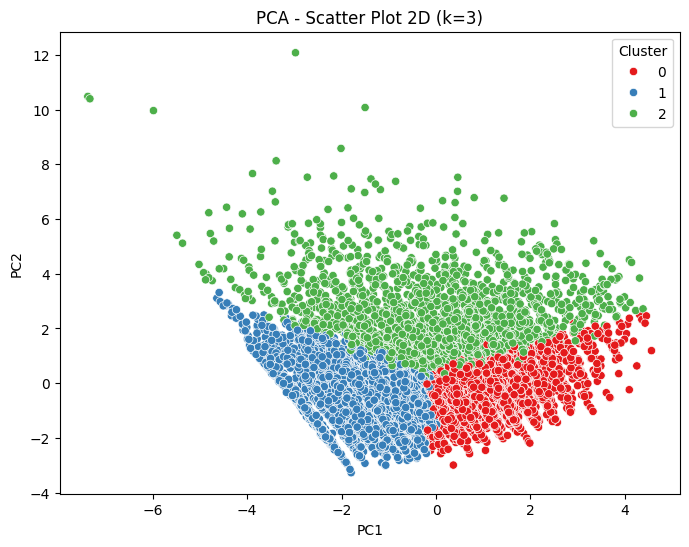

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:,0]
df["PC2"] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", palette="Set1")
plt.title("PCA - Scatter Plot 2D (k=3)")
plt.show()


In [16]:
df.groupby("Cluster")["Price"].mean()



Cluster
0    6.233262
1    4.843939
2    6.575536
Name: Price, dtype: float64

In [17]:
df.groupby("Cluster").mean(numeric_only=True)

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price,PC1,PC2
Cluster,,,,,,,,,
0,48.066544,4.211156,4.030964,4.187959,3.650306,3.743469,6.233262,1.185015,-0.431531
1,68.213919,4.548085,5.264055,1.967348,2.184387,1.819703,4.843939,-1.469722,-0.528793
2,93.740432,5.634198,8.213833,3.025774,4.062182,3.966944,6.575536,0.057216,1.964023


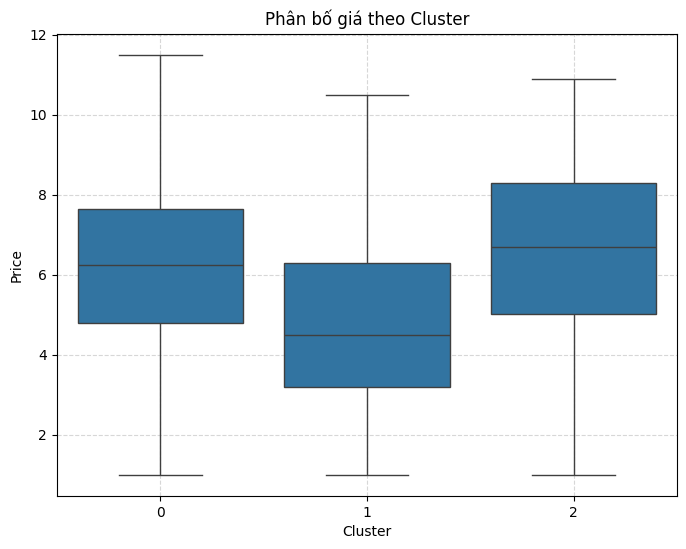

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x="Cluster", y="Price", data=df)
plt.title("Phân bố giá theo Cluster")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

